# Unsupervised learning

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Principal Component Analysis

Problem:
- many variables/features means many **dimensions**
- As dimensions increase, more data is needed to fill the "empty spaces"
- We don't have this much data

Consider 2 features ($x_1, x_2$) en $x_2 = 3x_1$

Why is this problematic? 

Solution: reduce dimensionality of the data with, e.g., PCA
- Unsupervised (we do not use outputs/labels/y-values)
- PCA projects $d$-dimensional data to a $(k < d)$-dimensional space such that the variance after projection is maximized.
- **Con**: new features are not interpretable
- **Pro**: new features convey almost the same amount of information as old features  
- https://setosa.io/ev/principal-component-analysis/

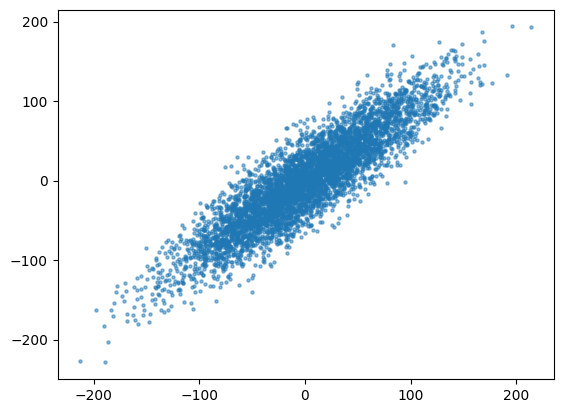

In [3]:
d = 2 # dimensionality of data

# multivariate normal parameters
mean = [0, 0]
cov = [
    [1, 0.9], 
    [0.9, 1]
]
# sample from multivariate normal
x = np.random.multivariate_normal(mean=mean, cov=cov, size=(5000,)) * 60

plt.scatter(x[:, 0], x[:, 1], s=5, alpha=0.5)

In [4]:
# standardize such that x in N(0, 1)
x = (x - x.mean(keepdims=True)) / x.std(keepdims=True)

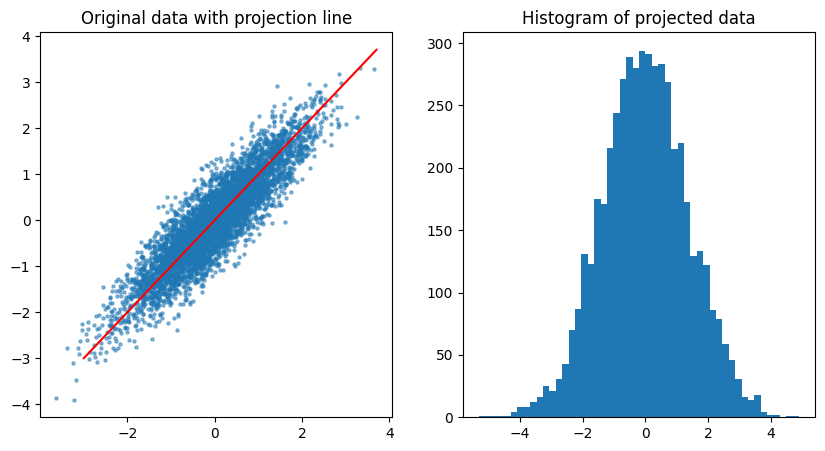

In [5]:
from sklearn.decomposition import PCA

# apply PCA with 1 component
pca = PCA(n_components=1).fit(x)
x_proj = pca.transform(x)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.scatter(x[:, 0], x[:, 1], s=5, alpha=0.5)

# plot original data + PCA projection line
mean = x.mean()
pc1x = pca.components_[0, 0] + mean
pc1y = pca.components_[0, 1] + mean
ax1.plot([mean-3, pc1x+3], [mean-3, pc1y+3], c='r')
ax1.set_title(f"Original data with projection line")

# histogram of projected data
ax2.hist(x_proj, bins=50)
ax2.set_title(f"Histogram of projected data")
plt.show()

In [6]:
x.shape, x_proj.shape

((5000, 2), (5000, 1))

## PCA analysis

How many principal components do we need? 

In [7]:
from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y=True)

X.shape, y.shape

((442, 10), (442,))

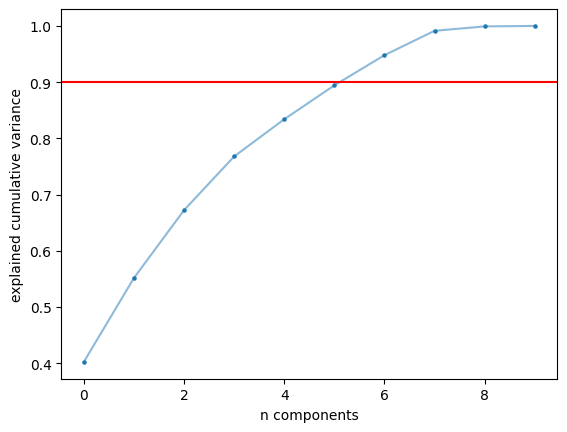

In [8]:
pca = PCA(n_components=X.shape[1]).fit(X)
X_proj = pca.transform(X)

cumulative_expl_var = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(len(pca.explained_variance_)), cumulative_expl_var, alpha=0.5)
plt.scatter(range(len(pca.explained_variance_)), cumulative_expl_var, s=5)
plt.xlabel("n components")
plt.ylabel("explained cumulative variance")
plt.axhline(0.9, color='red')

In [9]:
cumulative_expl_var

array([0.40242108, 0.55165304, 0.67224967, 0.76779731, 0.83401545,
       0.89428716, 0.94794372, 0.99131192, 0.99914393, 1.        ])

In [10]:
pca = PCA(n_components=.9, svd_solver='full').fit(X)
pca_X = pca.transform(X)

pca_X.shape

(442, 7)

## Clustering

In [12]:
class_ratings = pd.DataFrame([
    [1, 2, 5, 1, 'A'],
    [4, 2, 3, 3, 'B'],
    [5, 1, 4, 3, 'C'],
    [3, 1, 4, 2, 'D'],
    [2, 5, 5, 1, 'E'],
    [2, 5, 5, 2, 'F'],
    [3, 1, 1, 1, 'G'],
], columns=['Music', 'Sports', 'Technology', 'Fashion', 'Name'])

In [15]:
from sklearn.cluster import KMeans

clusters = KMeans(n_clusters=2).fit_predict(class_ratings.iloc[:, :-1])
clusters

array([1, 0, 0, 0, 1, 1, 0], dtype=int32)

In [17]:
class_ratings['Cluster'] = clusters

class_ratings

,Music,Sports,Technology,Fashion,Name,Cluster
0,1,2,5,1,A,1
1,4,2,3,3,B,0
2,5,1,4,3,C,0
3,3,1,4,2,D,0
4,2,5,5,1,E,1
5,2,5,5,2,F,1
6,3,1,1,1,G,0
